# Diamonds Price Prediction: Exploring and Modeling Diamond Valuation

Welcome to this notebook dedicated to the fascinating world of diamonds! In this exploration, we delve deep into the Diamonds Price Dataset, aiming to uncover patterns and insights that govern diamond prices. With a rich set of attributes such as carat weight, cut quality, color, and clarity, we embark on a journey to understand the intricacies of diamond valuation.

Through this notebook, you'll witness:
- Comprehensive data exploration to understand the characteristics of diamonds.
- Visualizations that provide intuitive insights into the relationship between diamond attributes and prices.
- Development of predictive models to forecast diamond prices with machine learning.

Whether you're a diamond enthusiast, a data science enthusiast, or simply curious about the factors influencing diamond prices, this notebook offers a blend of data analysis and modeling to satisfy your curiosity.

Let's embark on this sparkling exploration!


### Table of contents:

* [Introduction](#1)
* [Import Libraries](#2)
* [Import Dataset](#3)
* [Preprocessing and Feature Engineering](#4)
* [data and Evaluate Regression Models](#5)
* [End](#6)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">  Introduction</p>


## Diamond Price Prediction through Regression Analysis

In this project, I endeavor to forecast the price of diamonds by meticulously analyzing their unique attributes. Diamonds, celestial gems formed deep within Earth's mantle over millennia, captivate with their brilliance and scarcity.

A diamond's worth is shaped by numerous elements, notably the renowned "Four Cs": 
- **Carat**: Denoting size, larger diamonds typically hold greater value.
- **Cut**: Reflecting proportions and craftsmanship, influencing its luminosity.
- **Color**: Graded from D (colorless) to Z (light tint), colorless variants being prized.
- **Clarity**: Gauging purity by examining inclusions or blemishes.

Beyond the "Four Cs", factors like fluorescence, indicating a diamond's UV response, and unique colorations such as pink or blue, further enhance its allure. Additionally, certifications from esteemed institutions like the Gemological Institute of America (GIA) bolster a diamond's authenticity and value.

Utilizing regression techniques, including LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, and RandomForestRegressor, my objective is to craft a model adept at gauging diamond values grounded in these multifaceted attributes.


<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Overview of the Dataset</p>



The dataset at hand comprises 10 distinct columns, each serving a specific purpose. Here's a concise breakdown:

| Features                                                       | Description       |
|---------------------------------------------------------------|-------------------|
| Diamond weight in carats                                       | `carat`           |
| Diamond cutting quality                                         | `cut`             |
| Diamond color ranking (J as the least desirable, D as the best)| `color`           |
| Clarity grade, ranging from I1 (lowest) to IF (highest)        | `clarity`         |
| Diamond length in millimeters                                   | `x`               |
| Diamond width in millimeters                                    | `y`               |
| Diamond depth in millimeters                                    | `z`               |
| Depth percentage relative to the mean of x and y                | `depth`           |
| Diameter at the widest point of the diamond                     | `table`           |
| Diamond Price                                                   | `price`           |


<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import the Libraries</p>



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go

<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import the Dataset</p>



In [2]:
# Import dataset
data = pd.read_csv('diamonds.csv')

<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Explore the Dataset</p>



In [3]:
#View the First Few Rows
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
#View the Last Few Rows
data.tail()

carat        cut color clarity  depth  table  price     x     y     z
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

In [5]:
#Check Data Types and Missing Values:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [6]:
#Check Basic Statistics
data.describe()

carat         depth         table         price             x  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.799444     61.753006     57.457830   3944.805440      5.734403   
std        0.475173      1.431088      2.232092   3997.938105      1.123077   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2410.000000      5.700000   
75%        1.040000     62.500000     59.000000   5351.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  50000.000000  50000.000000  
mean       5.737956      3.541056  
std        1.145579      0.707065  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [7]:
#Count of Unique Values in Each Column
data.nunique()

carat        272
cut            5
color          7
clarity        8
depth        181
table        126
price      11297
x            553
y            551
z            371
dtype: int64

In [8]:
#Check for Missing Values in Each Column
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
#Dropping not acceptable negative values
#x, y and z are length so they can't be less or equal than zero 
data = data.loc[~(((data['x'] <= 0) | (data['y'] <= 0)) | (data['z'] <= 0))]

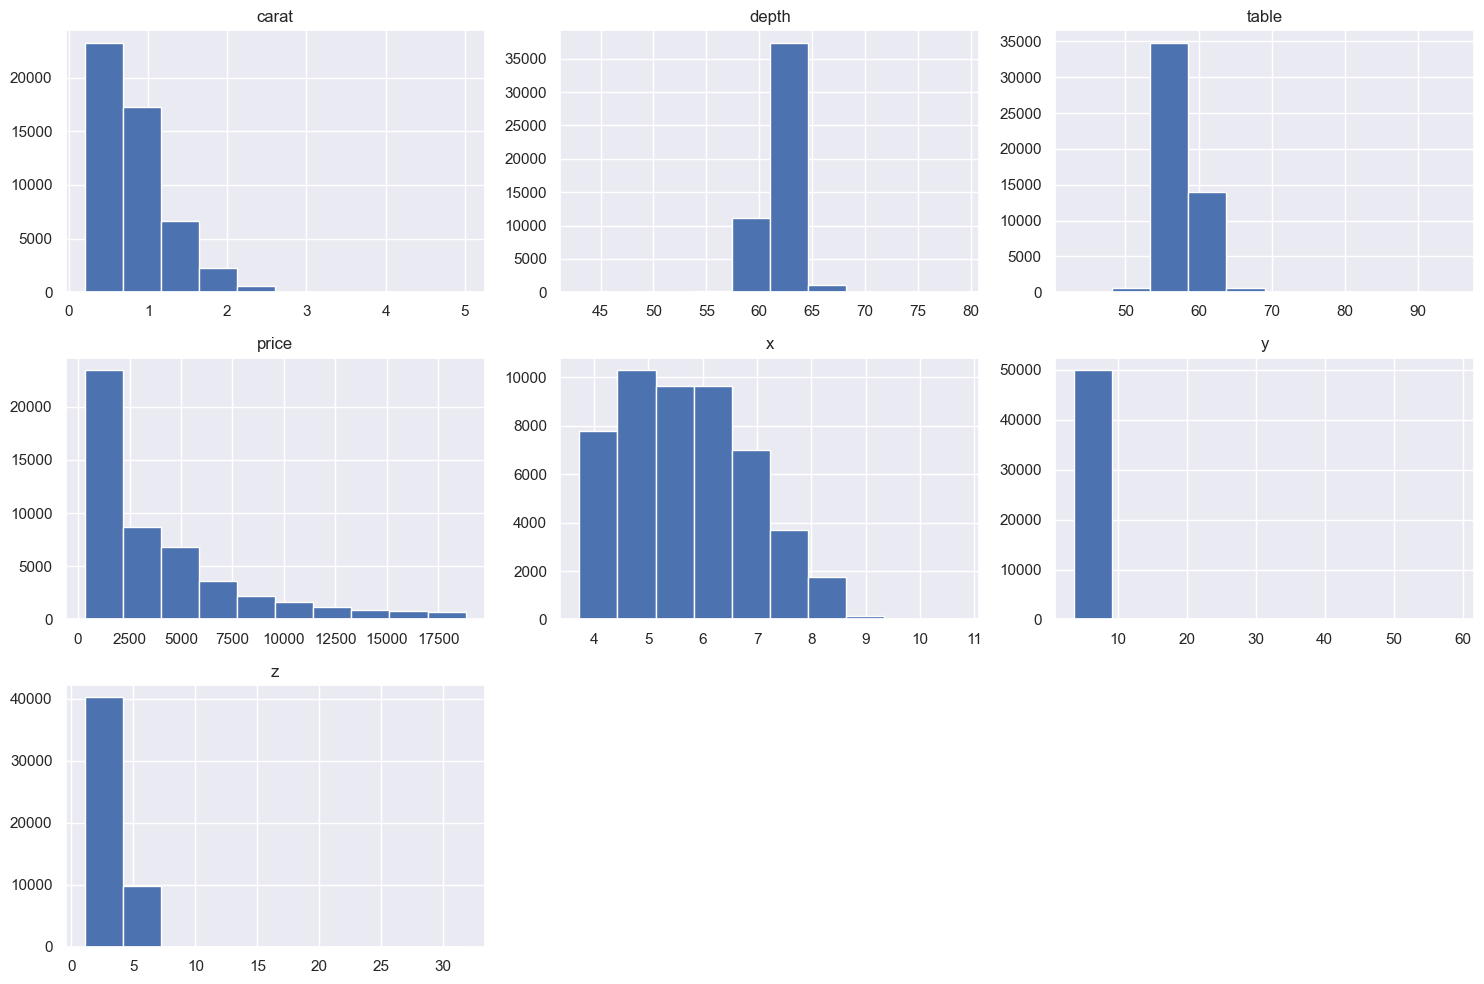

In [10]:
#Histogram for Numeric Columns
import matplotlib.pyplot as plt
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

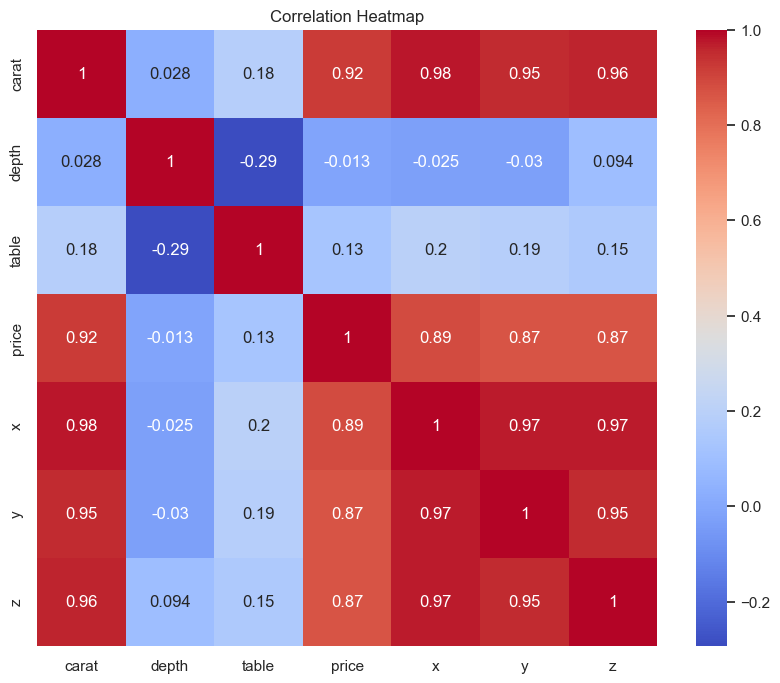

In [11]:
#Correlation Heatmap for Numeric Columns
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Display correlation values in a table
correlation_table = correlation_matrix.unstack().sort_values().drop_duplicates()
correlation_table

table  depth   -0.292930
y      depth   -0.029727
depth  x       -0.025489
price  depth   -0.012848
carat  depth    0.027716
depth  z        0.094485
table  price    0.129987
z      table    0.154473
table  carat    0.183694
       y        0.185907
x      table    0.197875
y      price    0.866840
z      price    0.867412
price  x        0.887742
       carat    0.921815
carat  y        0.952244
y      z        0.954284
z      carat    0.959792
x      y        0.973220
z      x        0.974266
x      carat    0.977687
carat  carat    1.000000
dtype: float64

In [13]:
# Filter the correlation table for correlations with 'price'
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Display the correlation values with 'price'
print(price_correlations)

price    1.000000
carat    0.921815
x        0.887742
z        0.867412
y        0.866840
table    0.129987
depth   -0.012848
Name: price, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

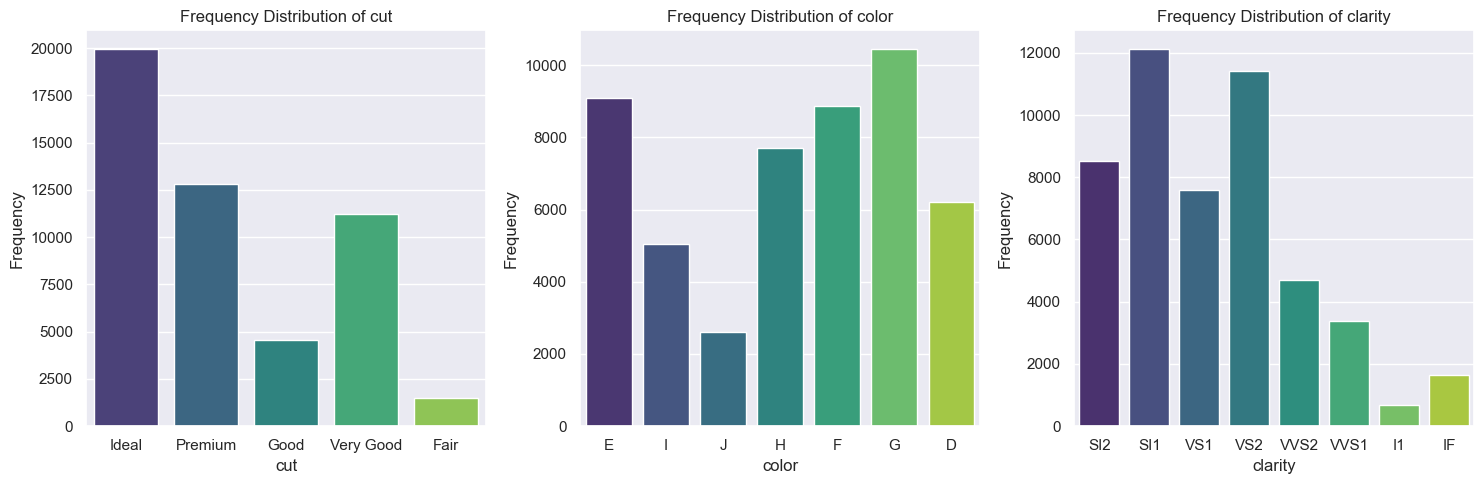

In [14]:
# bar plots for the categorical variables cut, color, and clarity 
# Define the categorical variables
categorical_vars = ['cut', 'color', 'clarity']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(15, 5))

# Plot bar plots for each categorical variable
for ax, var in zip(axes, categorical_vars):
    sns.countplot(data=data, x=var, ax=ax, palette='viridis')
    ax.set_title(f'Frequency Distribution of {var}')
    ax.set_xlabel(f'{var}')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

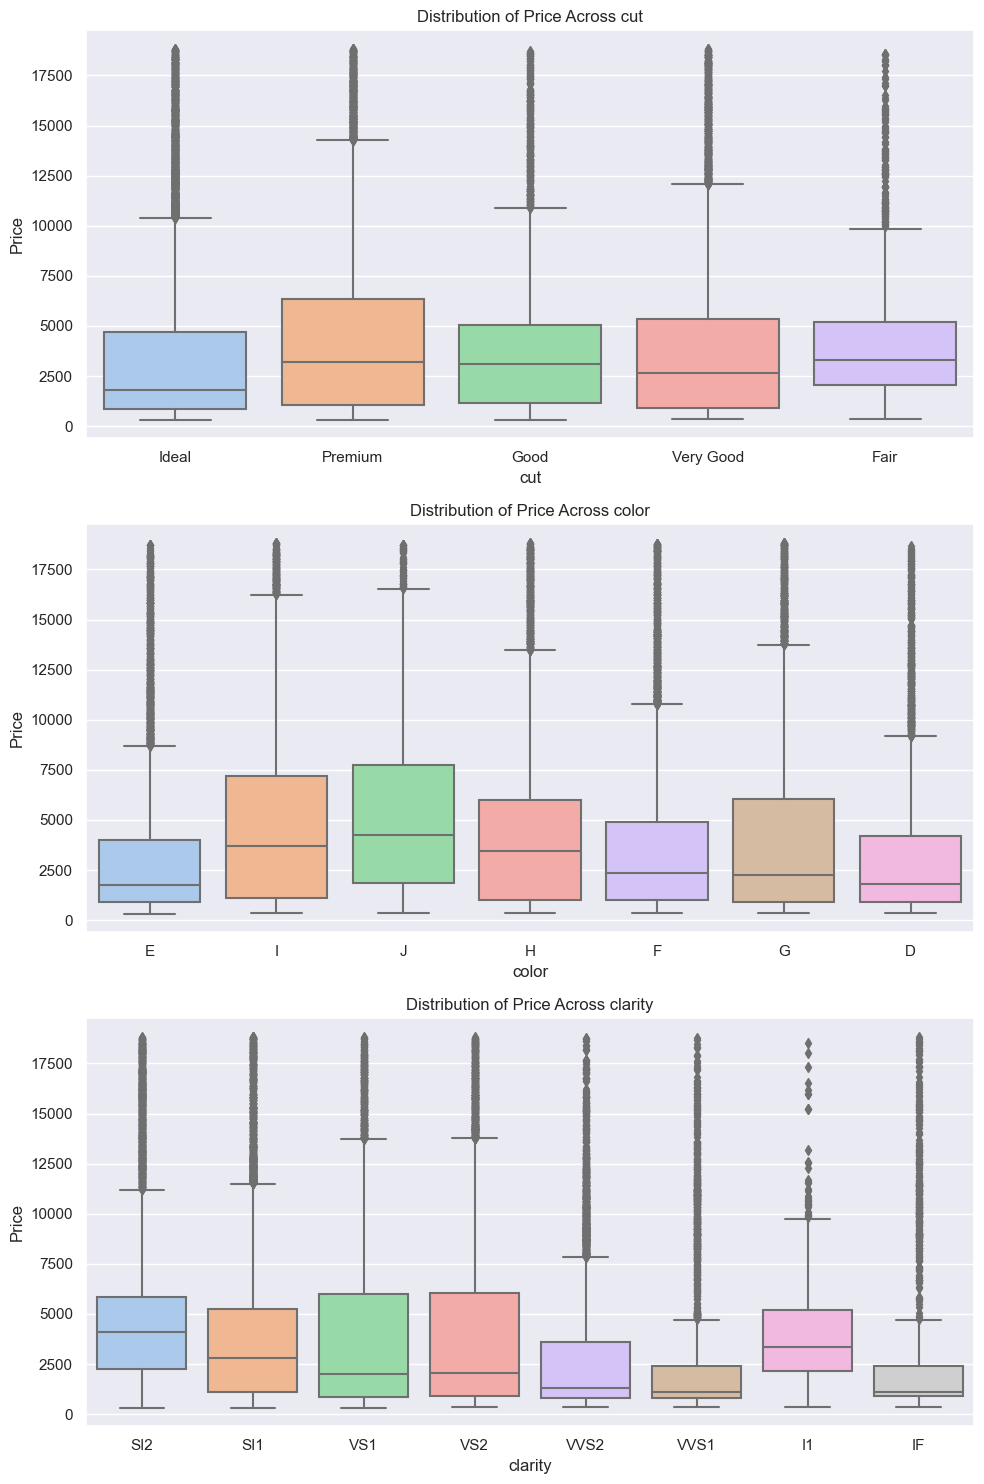

In [15]:
#boxplots to visualize the distribution of price across different levels of the categorical variables cut, color, and clarity
# Define the categorical variables
categorical_vars = ['cut', 'color', 'clarity']

# Create subplots
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(10, 15))

# Plot boxplots for each categorical variable
for ax, var in zip(axes, categorical_vars):
    sns.boxplot(data=data, x=var, y='price', ax=ax, palette='pastel')
    ax.set_title(f'Distribution of Price Across {var}')
    ax.set_xlabel(f'{var}')
    ax.set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

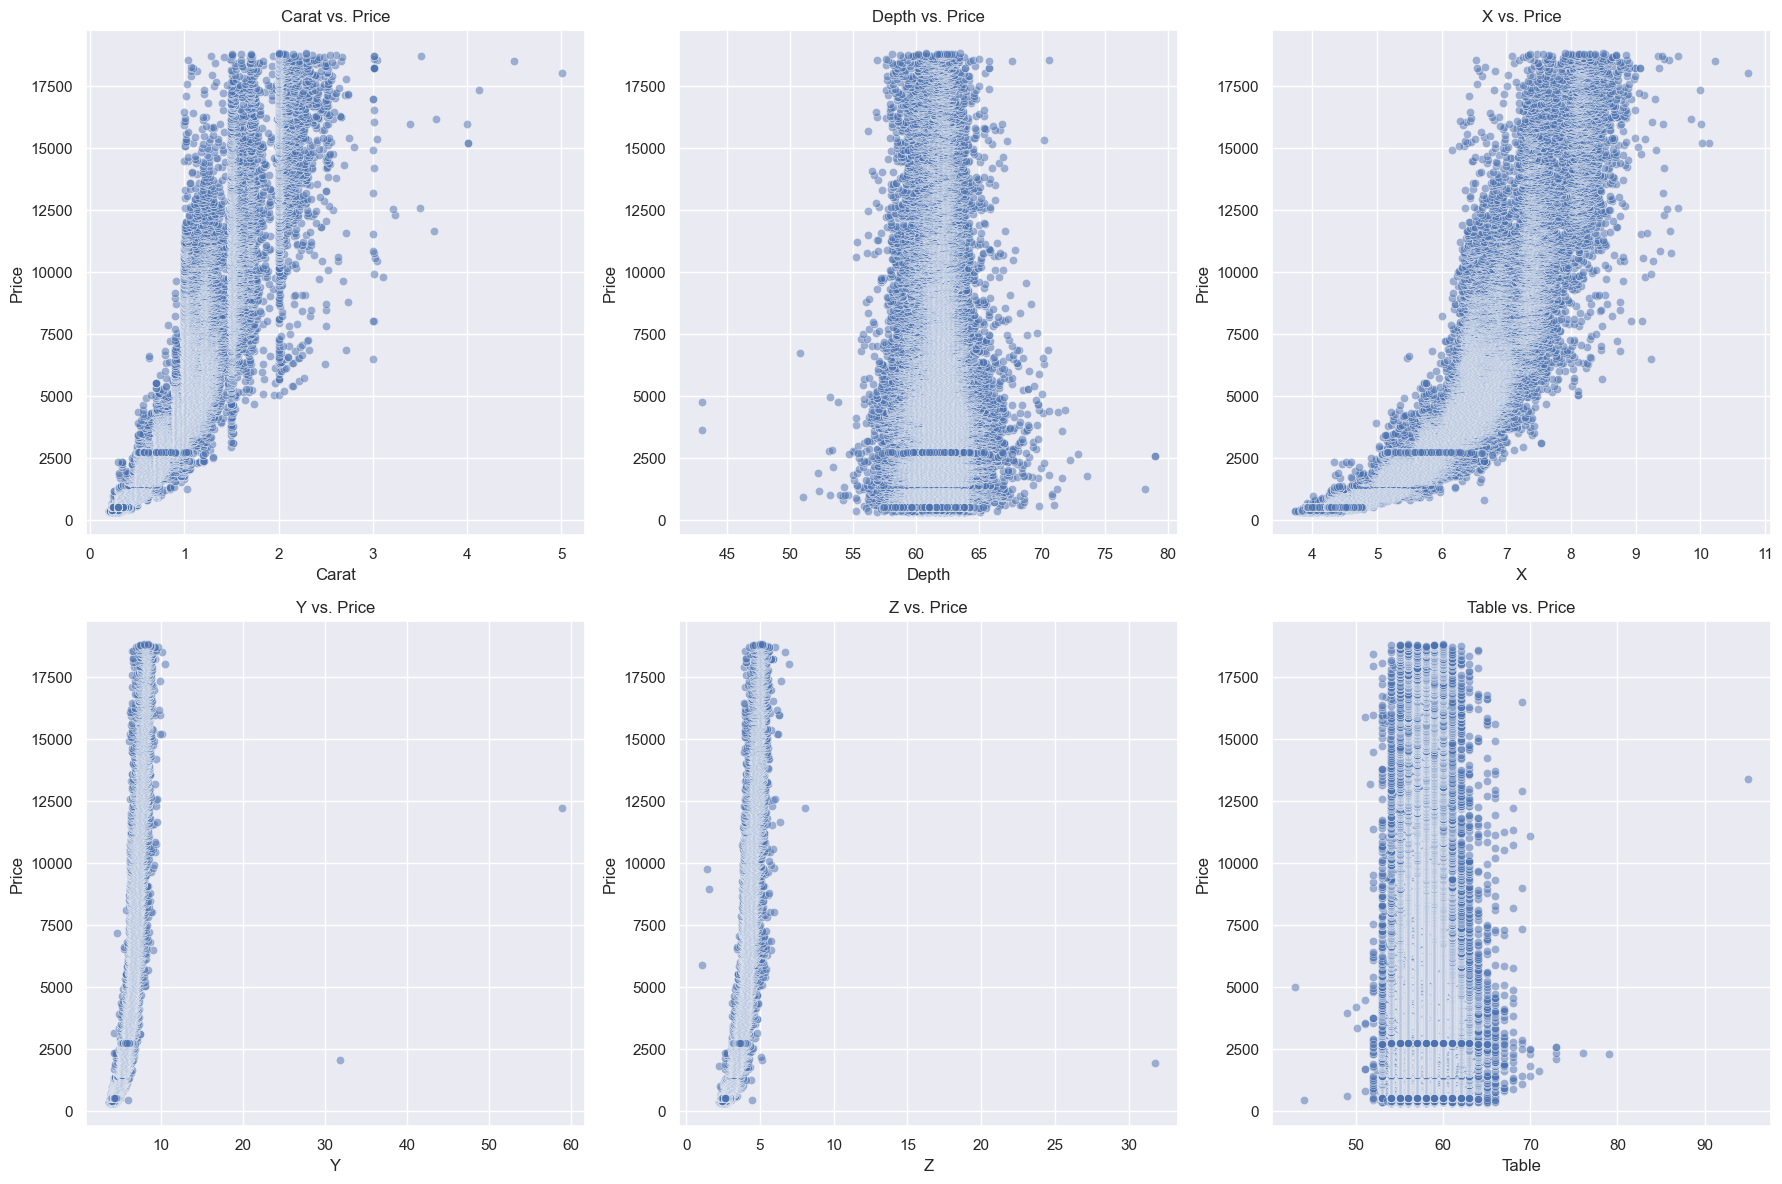

In [16]:
#scatter plots for the continuous variables carat, depth, x, y, z, and table vs. price 
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Scatter plots

# 'carat' vs. 'price'
sns.scatterplot(data=data, x='carat', y='price', ax=axes[0, 0], alpha=0.5)
axes[0, 0].set_title('Carat vs. Price')
axes[0, 0].set_xlabel('Carat')
axes[0, 0].set_ylabel('Price')

# 'depth' vs. 'price'
sns.scatterplot(data=data, x='depth', y='price', ax=axes[0, 1], alpha=0.5)
axes[0, 1].set_title('Depth vs. Price')
axes[0, 1].set_xlabel('Depth')
axes[0, 1].set_ylabel('Price')

# 'x' vs. 'price'
sns.scatterplot(data=data, x='x', y='price', ax=axes[0, 2], alpha=0.5)
axes[0, 2].set_title('X vs. Price')
axes[0, 2].set_xlabel('X')
axes[0, 2].set_ylabel('Price')

# 'y' vs. 'price'
sns.scatterplot(data=data, x='y', y='price', ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Y vs. Price')
axes[1, 0].set_xlabel('Y')
axes[1, 0].set_ylabel('Price')

# 'z' vs. 'price'
sns.scatterplot(data=data, x='z', y='price', ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('Z vs. Price')
axes[1, 1].set_xlabel('Z')
axes[1, 1].set_ylabel('Price')

# 'table' vs. 'price'
sns.scatterplot(data=data, x='table', y='price', ax=axes[1, 2], alpha=0.5)
axes[1, 2].set_title('Table vs. Price')
axes[1, 2].set_xlabel('Table')
axes[1, 2].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
#average price for each category of a categorical variable
#Mean Price for Each Category: cut
mean_price_by_cut = data.groupby('cut')['price'].mean()
print(mean_price_by_cut)


cut
Fair         4328.331995
Good         3958.447738
Ideal        3462.441685
Premium      4603.354849
Very Good    3986.482728
Name: price, dtype: float64


In [18]:
#average price for each category of a categorical variable
#Mean Price for Each Category: color
mean_price_by_color = data.groupby('color')['price'].mean()
print(mean_price_by_color)


color
D    3176.887514
E    3084.542763
F    3740.341045
G    4001.642187
H    4492.994161
I    5103.014633
J    5343.118189
Name: price, dtype: float64


In [19]:
#average price for each category of a categorical variable
#Mean Price for Each Category: clarity
mean_price_by_clarity = data.groupby('clarity')['price'].mean()
print(mean_price_by_clarity)


clarity
I1      3941.739067
IF      2902.974265
SI1     3998.802377
SI2     5090.563154
VS1     3838.685273
VS2     3934.746667
VVS1    2539.249406
VVS2    3276.512356
Name: price, dtype: float64


In [20]:
#Median Price for Each Category:cut
#The median is another measure of central tendency, useful when dealing with skewed distributions.
median_price_by_cut = data.groupby('cut')['price'].median()
print(median_price_by_cut)

cut
Fair         3279.0
Good         3080.5
Ideal        1814.0
Premium      3199.0
Very Good    2635.0
Name: price, dtype: float64


In [21]:
#Median Price for Each Category:color
#The median is another measure of central tendency, useful when dealing with skewed distributions.
median_price_by_color = data.groupby('color')['price'].median()
print(median_price_by_color)

color
D    1828.0
E    1743.0
F    2352.0
G    2247.0
H    3452.0
I    3725.0
J    4266.5
Name: price, dtype: float64


In [22]:
#Median Price for Each Category:clarity
#The median is another measure of central tendency, useful when dealing with skewed distributions.
median_price_by_clarity = data.groupby('clarity')['price'].median()
print(median_price_by_clarity)

clarity
I1      3351.0
IF      1084.0
SI1     2826.5
SI2     4077.0
VS1     2016.0
VS2     2056.5
VVS1    1092.5
VVS2    1323.0
Name: price, dtype: float64


In [23]:
# counts of cut within each color category
# Sample the data and sort it by index for consistency
sample_data = data.sample(n=10000, replace=False, random_state=123).sort_index()

# Create the histogram
fig = px.histogram(sample_data, 
                   x='cut', 
                   facet_col='color', 
                   title='Cut Counts By Each Color', 
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Show the plot
fig.show()

In [24]:
# counts of clarity within each color category.
# Sample the data and sort it by index for consistency
sample_data = data.sample(n=10000, replace=False, random_state=123).sort_index()

# Create the histogram
fig = px.histogram(sample_data, 
                   x='clarity', 
                   facet_col='color', 
                   title='Clarity By Each Color', 
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Show the plot
fig.show()

 -----------

<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Feature Preprocessing and Engineering </p>

## Combining x, y, z due to high correlation and dropping them
Combining correlated features like x, y, and z can simplify data and reduce dimensionality, aiding algorithms and potentially improving model performance. However, this may lead to loss of specific feature information. It's crucial to assess the trade-offs and re-evaluate feature importance post-combination.

Volume Estimation: Utilizing the dimensions x, y, and z, the volume of each diamond can be determined using the formula: volume = x * y * z. This derived feature offers insight into the diamond's physical dimensions.

In [25]:
# Compute the product of 'x', 'y', and 'z' to derive the diamond volume
data['volume'] = data['x'] * data['y'] * data['z']

## Feature Importnce:Pre-evaluation

In [26]:
data.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

      volume  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250

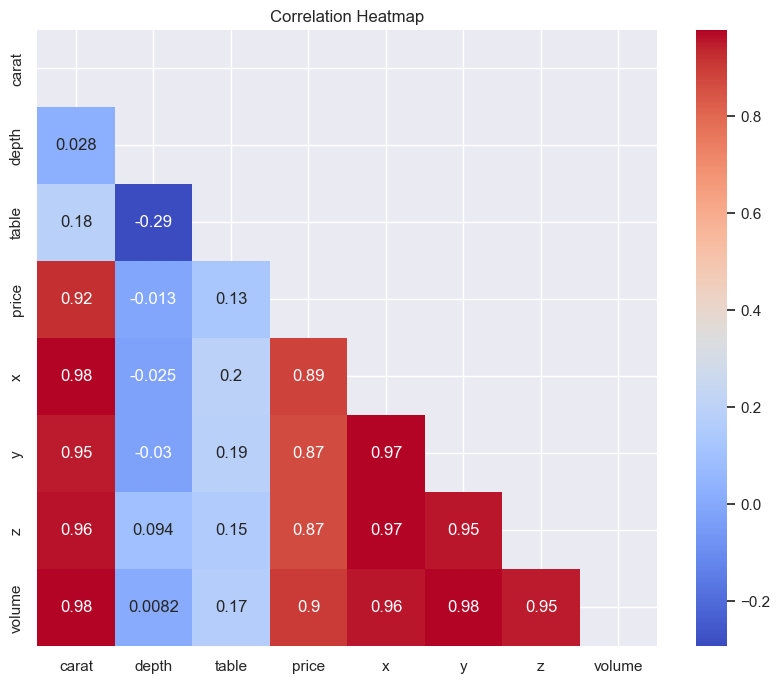

In [27]:
# Correlation Heatmap for Numeric Columns
# Select only numeric columns
numeric_columns1 = data.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
correlation_matrix1 = numeric_columns1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix1, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# Removing Rows with Zero Values
def drop_rows_with_zero(df, col):
    index = df[df[col] == 0].index
    return df.drop(index, inplace=False)

data = drop_rows_with_zero(data, 'x')
data = drop_rows_with_zero(data, 'z')

In [29]:
# Drop duplicated samples 
data= data.drop_duplicates(keep='first')

In [30]:
# Drop columns 'x', 'y', and 'z' from the DataFrame
data.drop(columns=['x', 'y', 'z'], axis=1, inplace=True)

In [31]:
data.head()

carat      cut color clarity  depth  table  price     volume
0   0.23    Ideal     E     SI2   61.5   55.0    326  38.202030
1   0.21  Premium     E     SI1   59.8   61.0    326  34.505856
2   0.23     Good     E     VS1   56.9   65.0    327  38.076885
3   0.29  Premium     I     VS2   62.4   58.0    334  46.724580
4   0.31     Good     J     SI2   63.3   58.0    335  51.917250

In [32]:
import pandas as pd

# One-hot encodes the 'cut', 'color', and 'clarity' columns.
def encode_categorical_features(data):

    for col in ['cut', 'color', 'clarity']:
        dummies_data = pd.get_dummies(data[col], prefix=col, dtype=int)
        data = pd.concat([data, dummies_data], axis=1)
        data = data.drop(columns=[col])  # Drop the original categorical column after encoding
        
    return data

# Encode the categorical features in the dataset
data_encoded = encode_categorical_features(data)

In [33]:
data.head()

carat      cut color clarity  depth  table  price     volume
0   0.23    Ideal     E     SI2   61.5   55.0    326  38.202030
1   0.21  Premium     E     SI1   59.8   61.0    326  34.505856
2   0.23     Good     E     VS1   56.9   65.0    327  38.076885
3   0.29  Premium     I     VS2   62.4   58.0    334  46.724580
4   0.31     Good     J     SI2   63.3   58.0    335  51.917250

In [34]:
data_encoded

carat  depth  table  price      volume  cut_Fair  cut_Good  cut_Ideal  \
0       0.23   61.5   55.0    326   38.202030         0         0          1   
1       0.21   59.8   61.0    326   34.505856         0         0          0   
2       0.23   56.9   65.0    327   38.076885         0         1          0   
3       0.29   62.4   58.0    334   46.724580         0         0          0   
4       0.31   63.3   58.0    335   51.917250         0         1          0   
...      ...    ...    ...    ...         ...       ...       ...        ...   
49995   0.72   60.8   57.0   2757  115.920000         0         0          1   
49996   0.72   63.1   55.0   2757  118.110175         0         1          0   
49997   0.70   62.8   60.0   2757  114.449728         0         0          0   
49998   0.86   61.0   58.0   2757  140.766120         0         0          0   
49999   0.75   62.2   55.0   2757  124.568444         0         0          1   

       cut_Premium  cut_Very Good  ...  color_I  color_J  clarity_I1  \
0                0              0  ...        0        0           0   
1                1              0  ...        0        0           0   
2                0              0  ...        0        0           0   
3                1              0  ...        1        0           0   
4                0              0  ...        0        1           0   
...            ...            ...  ...      ...      ...         ...   
49995            0              0  ...        0        0           0   
49996            0              0  ...        0        0           0   
49997            0              1  ...        0        0           0   
49998            1              0  ...        0        0           0   
49999            0              0  ...        0        0           0   

       clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0               0            0            1            0            0   
1               0            1            0            0            0   
2               0            0            0            1            0   
3               0            0            0            0            1   
4               0            0            1            0            0   
...           ...          ...          ...          ...          ...   
49995           0            1            0            0            0   
49996           0            1            0            0            0   
49997           0            1            0            0            0   
49998           0            0            1            0            0   
49999           0            0            1            0            0   

       clarity_VVS1  clarity_VVS2  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  
...             ...           ...  
49995             0             0  
49996             0             0  
49997             0             0  
49998             0             0  
49999             0             0  

[49857 rows x 25 columns]

In [35]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
Y = data_encoded['price']
X = data_encoded.drop(columns=['price'])

# Split the trainset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=100)  # Using a random state for reproducibility

In [36]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training train, then transform the test train
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

The reason for this is that many machine learning algorithms are sensitive to the scale of the input features. Using features that are on vastly different scales can lead to the model being biased towards features with larger scales. By scaling the features to have a mean of 0 and a standard deviation of 1 (as done with StandardScaler), you make it easier for the algorithm to find an optimal solution and often improve the model's performance.

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Train and Evaluate Regression Models </p>

After cleaning the data and making necessary feature adjustments, the next step is to train a model capable of predicting the target variable for this task.

## Model 1: LinearRegression

In [37]:
# Create a LinearRegression object
lr = LinearRegression()
lr.fit(scaled_x_train, y_train)

# Evaluate the model on the test set
y_pred = lr.predict(scaled_x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test set MSE:", mse)
print("Test set MAE:", mae)  
print("Test set R^2:", r2)

Test set MSE: 1303842.8135417115
Test set MAE: 802.7520127027292
Test set R^2: 0.917211289858903


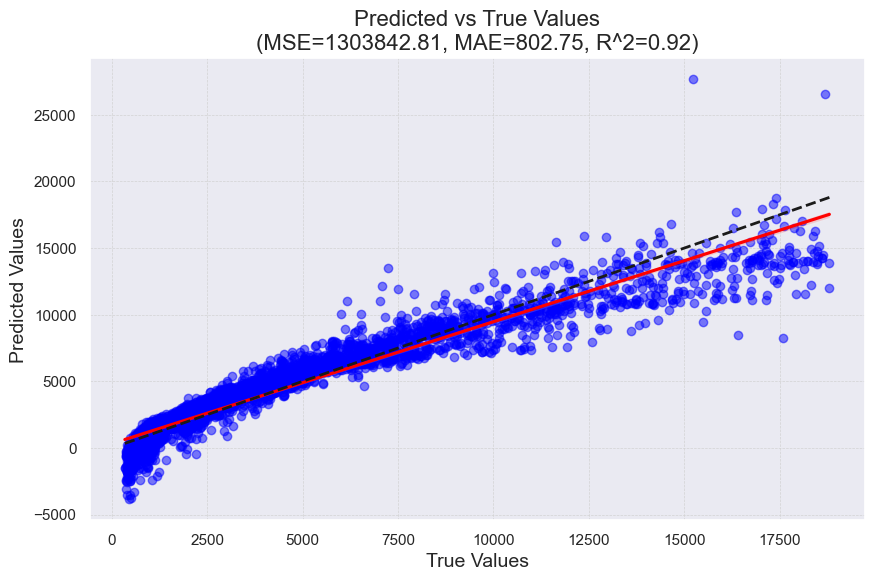

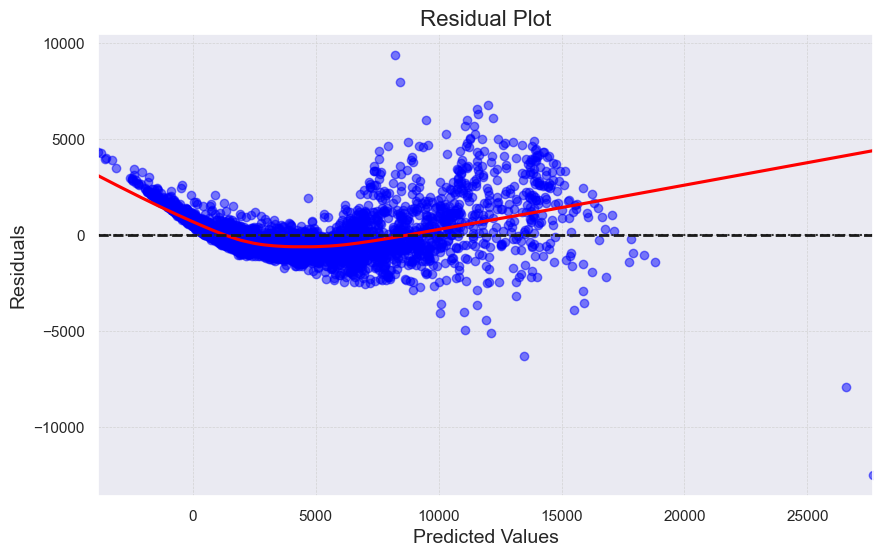

In [38]:
# Plot the predicted vs true values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha':0.5},line_kws={'color': 'red'})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Predicted vs True Values\n(MSE={:.2f}, MAE={:.2f}, R^2={:.2f})'.format(mse, mae, r2), fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot the residuals vs predicted values
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5},lowess=True, line_kws={'color': 'red'})
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'k--', lw=2)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

## Hyperparameters and GridSearch:Introduction

- **Hyperparameters**: In machine learning, hyperparameters are parameters that are not learned from the data but are set before training. Examples include the depth of a decision tree, the number of neighbors in a k-nearest neighbors algorithm, or the learning rate in gradient descent.

  **Importance of Hyperparameters**: The choice of hyperparameters can significantly influence the performance of a machine learning model. Suboptimal hyperparameters can lead to poor performance, longer training times, or even overfitting.

- **GridSearch**: It's a technique used to tune hyperparameters by exhaustively searching through a specified subset of hyperparameter combinations. For each combination, the model is trained and evaluated using cross-validation to find the set of hyperparameters that yields the best performance metric (e.g., accuracy, MSE, R^2).

   **Process**: 
   - Define a grid of hyperparameters and their potential values.
   - Train the model for each combination of hyperparameters.
   - Evaluate the model using cross-validation and record the performance.
   - Select the hyperparameters that yield the best performance metric.

   **Benefits**:
   - **Optimization**: Helps in finding the best hyperparameters for a given dataset and model architecture.
   - **Efficiency**: While exhaustive, GridSearch ensures that no combination is missed, which can be especially useful for smaller hyperparameter spaces.
   - **Consistency**: Provides a systematic and consistent method for hyperparameter tuning across different datasets and problems.

  In conclusion, hyperparameters play a crucial role in machine learning models' performance. Techniques like GridSearch help in automating the process of finding the optimal hyperparameters, ensuring better model performance and reliability.

## Model 2: KNeighborsRegressor

### Finding best hyperparameters using GridSearchCV


In [39]:
# Hyperparameter Tuning for K-Nearest Neighbors Regression

param_grid = {
    'n_neighbors': range(3, 11, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(scaled_x_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_

print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(scaled_x_test)
test_r2 = r2_score(y_test, y_pred)

print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9593151407854883
Best hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
R2 score on test set: 0.9668765419890885


In [40]:
# Train KNeighborsRegressor model with best hyperparameters
model_knn = KNeighborsRegressor(n_neighbors=5, p=1, weights='distance')
model_knn.fit(scaled_x_train, y_train)

# Evaluate the model on the test set
y_pred = model_knn.predict(scaled_x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)


Test set MSE: 521662.7075548412
Test set MAE: 371.8425083764215
Test set R^2: 0.9668765419890885


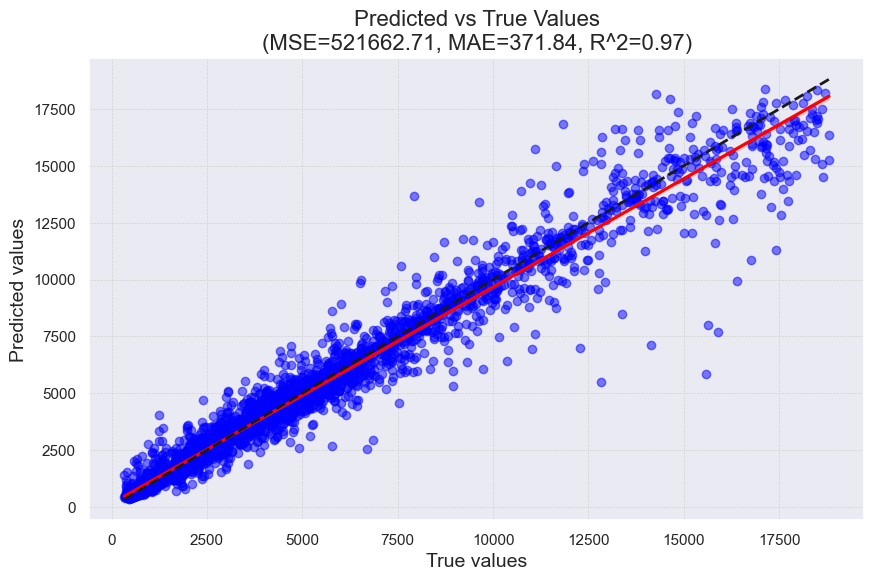

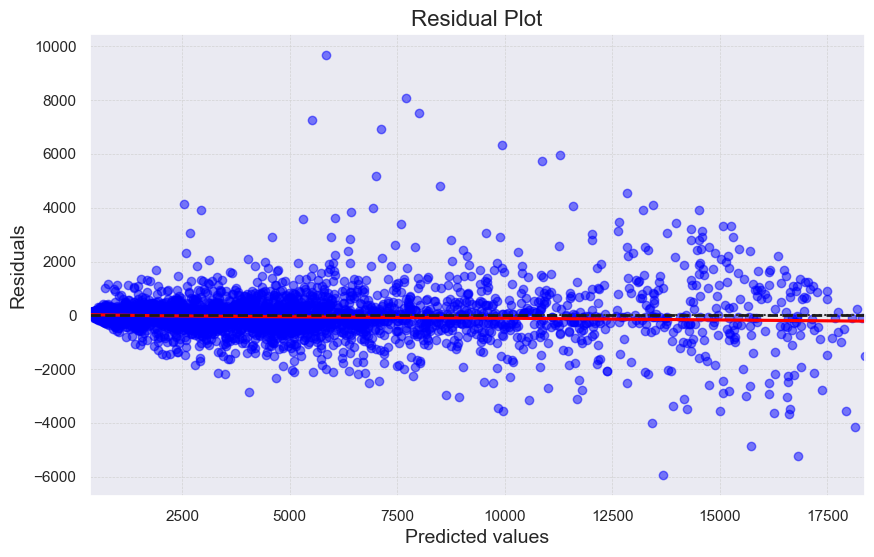

In [41]:
# Plot the predicted vs true values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha': 0.5},line_kws={'color': 'red'})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title('Predicted vs True Values\n(MSE={:.2f}, MAE={:.2f}, R^2={:.2f})'.format(mse, mae, r2), fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot the residuals vs predicted values
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha': 0.5},lowess=True, line_kws={'color': 'red'})
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'k--', lw=2)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

## Model 3: DecisionTreeRegressor

### Finding best hyperparameters using GridSearchCV

In [42]:
# Hyperparameter Tuning for DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(scaled_x_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_

print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(scaled_x_test)
test_r2 = r2_score(y_test, y_pred)

print(f"R2 score on test set: {test_r2}")


Best R2 score: 0.9747919729160266
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 25}
R2 score on test set: 0.9752376010765779


In [43]:
# Train DecisionTreeRegressor model with best hyperparameters
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=25)
dt.fit(scaled_x_train, y_train)

# Evaluate the model on the test set
y_pred = dt.predict(scaled_x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)


Test set MSE: 393382.5041657568
Test set MAE: 315.9309350678312
Test set R^2: 0.975021812619044


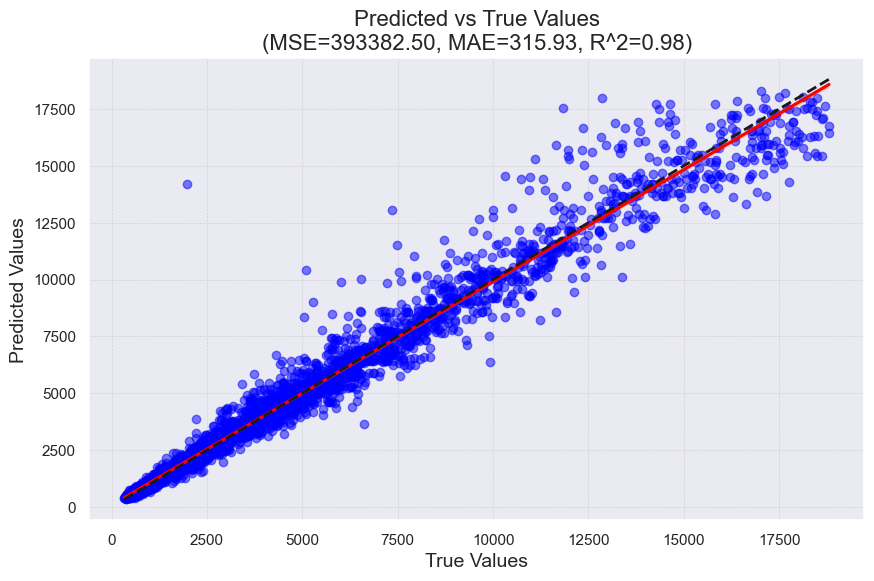

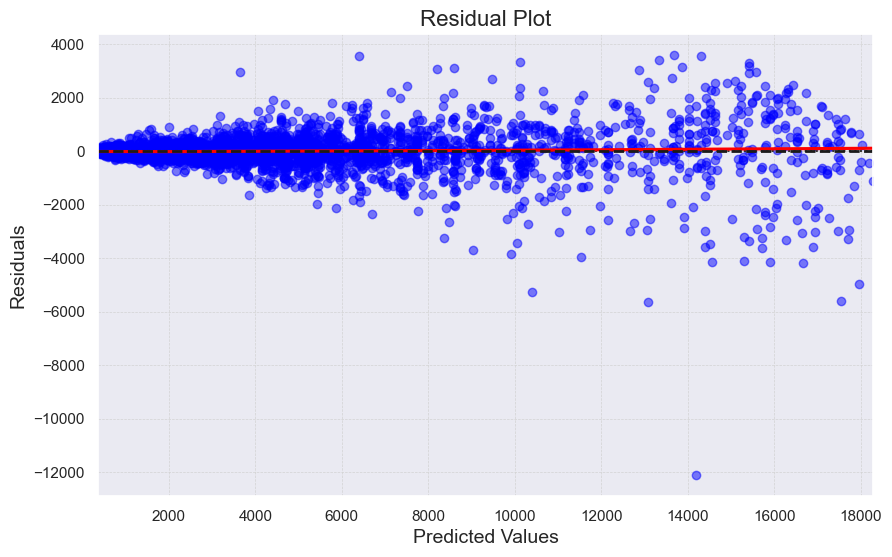

In [44]:
# Plot the predicted vs true values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha': 0.5},line_kws={'color': 'red'})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Predicted vs True Values\n(MSE={:.2f}, MAE={:.2f}, R^2={:.2f})'.format(mse, mae, r2), fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot the residuals vs predicted values
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha': 0.5},lowess=True, line_kws={'color': 'red'})
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'k--', lw=2)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

- By enhancing our model, we achieved a 98% accuracy rate 🏆.

# Model 4: RandomForestRegressor

### Finding best hyperparameters using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Create a base model
RF_model = RandomForestRegressor()

# Instantiate the grid search model with reduced CV folds
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, 
                           n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(scaled_x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions
y_pred = best_model.predict(scaled_x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test set MSE: 307894.5747894996
Test set MAE: 287.9824265136466
Test set R^2: 0.9804499480753945


In [46]:
# Define the best hyperparameters obtained from the grid search
best_params = {
    'n_estimators': grid_search.best_params_['n_estimators'],
    'max_depth': grid_search.best_params_['max_depth'],
    'min_samples_split': grid_search.best_params_['min_samples_split'],
    'min_samples_leaf': grid_search.best_params_['min_samples_leaf'],
    'max_features': grid_search.best_params_['max_features']
}

# Train RandomForestRegressor model with the best hyperparameters
RF_model = RandomForestRegressor(**best_params)
RF_model.fit(scaled_x_train, y_train)

# Evaluate the model on the test set
y_pred = RF_model.predict(scaled_x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the test metrics
print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)

Test set MSE: 312469.6126484959
Test set MAE: 289.1390484722302
Test set R^2: 0.980159451798344


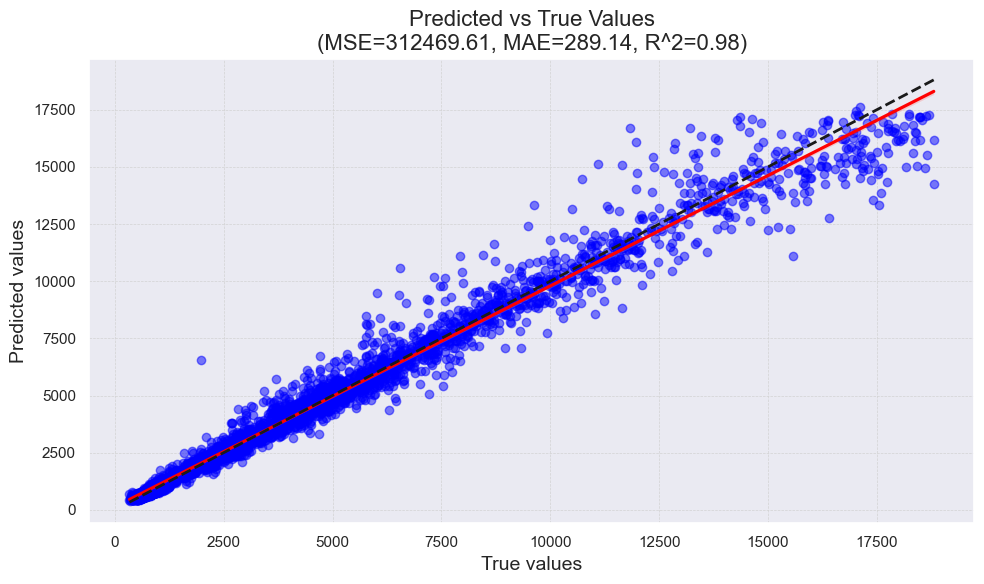

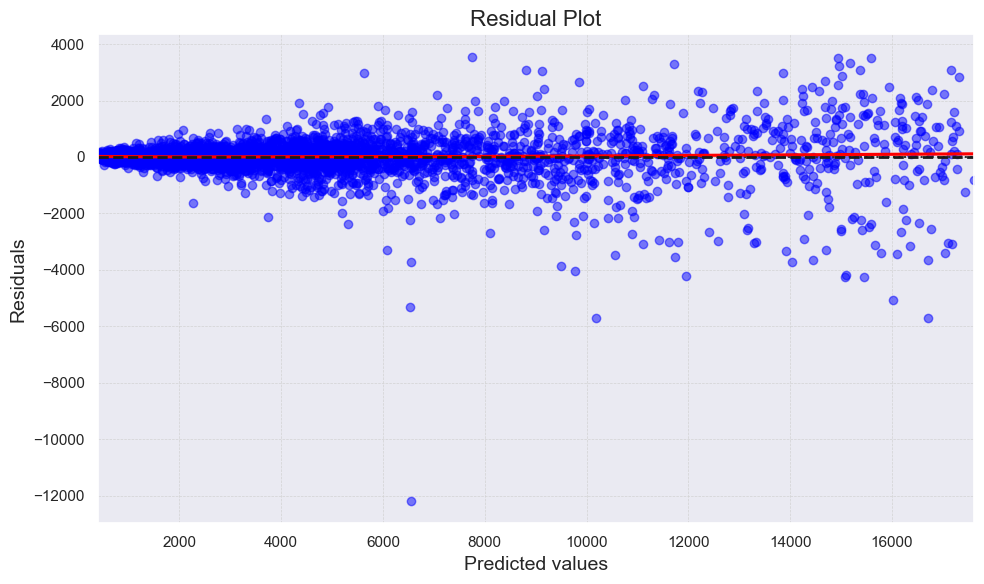

In [47]:
# Plot the predicted vs true values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title('Predicted vs True Values\n(MSE={:.2f}, MAE={:.2f}, R^2={:.2f})'.format(mse, mae, r2), fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot the residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5}, lowess=True, line_kws={'color': 'red'})
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'k--', lw=2)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

----

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Feature Importance:Post-Evaluation </p>

## SHAP (SHapley Additive exPlanations)
SHAP offers a comprehensive method to interpret the predictions made by machine learning models, presenting a consistent metric for gauging the significance of features.

### Analyze Each Model Individually

- Examining the model coefficients


To visualize the model coefficients of linear models such as LinearRegression, you can retrieve them directly. However, it's important to recognize that models like RandomForestRegressor and KNeighborsRegressor don't possess coefficients in the conventional sense of linear models. Instead, for tree-based models, you can examine feature importances.

In [ ]:
# def display_model_coefficients(models):
 #   for model_name, model in models.items():
  #      print(f"Model: {model_name}")
        
 #       if model_name == 'LinearRegression':
            # For LinearRegression
            coefficients = model.coef_
            intercept = model.intercept_
            print(f"Intercept: {intercept}")
            for idx, coef in enumerate(coefficients):
                print(f"Coefficient for feature {idx+1}: {coef}")
                
     #   elif model_name in ['RandomForestRegressor', 'DecisionTreeRegressor', 'KNeighborsRegressor']:
            # For tree-based models, display feature importances
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
                for idx, importance in enumerate(importances):
                    print(f"Importance for feature {idx+1}: {importance}")
       #     else:
                print(f"Model {model_name} does not support feature importances.")
                
        print("="*50)

# trained models
#models = {
    'RandomForestRegressor': RF_model,
    'DecisionTreeRegressor': dt,
    'LinearRegression': lr,
    'KNeighborsRegressor':  model_knn
}

#display_model_coefficients(models)

- Analyze the feature importance for each model using SHAP

In [ ]:

#import shap
#import matplotlib.pyplot as plt

# trained models
#models = {
    'RandomForestRegressor': RF_model,
    'DecisionTreeRegressor': dt,
    'LinearRegression': lr,
    'KNeighborsRegressor':  model_knn
}

## Function to generate SHAP summary plot for each model
#def plot_shap_summary(model, X, model_name):
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, feature_names=X.columns, title=f'SHAP Summary Plot - {model_name}')

#  scaled_x_test is the test set
#for model_name, model in models.items():
  #  plot_shap_summary(model, scaled_x_test, model_name)

#plt.show()


## NB: I am still working on this section of the notebook. I will update it when I am done.